In [1]:

import os


import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("C:\\Users\\80071\\Downloads\\Consumer_Complaints.csv")

In [3]:
df.shape

(1432384, 18)

In [7]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08/09/2015,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,08872,NaN,Consent not provided,Web,08/09/2015,Closed with non-monetary relief,Yes,No,1509954
1,01/29/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",NY,10801,NaN,Consent not provided,Web,01/30/2019,Closed with non-monetary relief,Yes,NaN,3136759
2,08/19/2015,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,Company chooses not to provide a public response,WELLS FARGO & COMPANY,CA,94526,NaN,Consent not provided,Web,08/19/2015,Closed with explanation,Yes,No,1527601
3,03/04/2016,Credit card,NaN,Billing disputes,NaN,I am dissatisfied with the current outcome of ...,NaN,DISCOVER BANK,NV,891XX,NaN,Consent provided,Web,03/04/2016,Closed with explanation,Yes,Yes,1816726
4,03/18/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",PA,175XX,NaN,NaN,Referral,03/19/2013,Closed with explanation,Yes,No,358304


In [4]:
df1 = df[['Product','Consumer complaint narrative']].copy()
df1.head()

,Product,Consumer complaint narrative
0,Credit reporting,NaN
1,"Credit reporting, credit repair services, or o...",NaN
2,Mortgage,NaN
3,Credit card,I am dissatisfied with the current outcome of ...
4,Mortgage,NaN


In [5]:
#df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]
df1.columns = ['Product','Consumer_complaint']

print(df1.head())
df1.shape
print(df1.columns)

                                             Product  \
0                                   Credit reporting   
1  Credit reporting, credit repair services, or o...   
2                                           Mortgage   
3                                        Credit card   
4                                           Mortgage   

                                  Consumer_complaint  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  I am dissatisfied with the current outcome of ...  
4                                                NaN  
Index(['Product', 'Consumer_complaint'], dtype='object')


In [6]:
df1 = df1[pd.notnull(df1['Consumer_complaint'])]

In [7]:
df1.describe().transpose()

,count,unique,top,freq
Product,461715,18,"Credit reporting, credit repair services, or o...",130474
Consumer_complaint,461715,438587,There are many mistakes appear in my report wi...,1035


In [8]:
df1.shape

(461715, 2)

In [9]:
df2 = df1.sample(100, random_state=1).copy()
df2.shape

(100, 2)

In [10]:
#Renaming correlated columns in product type hence decreasing ovrall number of product categories 
df2.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [11]:
print(pd.DataFrame(df2['Product'].unique()))
df2.shape

                                           0
0                            Debt collection
1         Credit reporting, repair, or other
2                Credit card or prepaid card
3                                   Mortgage
4                               Student loan
5                      Vehicle loan or lease
6                Checking or savings account
7  Payday loan, title loan, or personal loan
8                    Bank account or service
9                              Consumer Loan


(100, 2)

In [12]:
print(df2['Product'].factorize()[0])

[0 1 2 3 1 3 1 1 2 0 0 1 0 4 0 3 5 0 0 0 1 1 4 3 1 0 2 0 4 0 1 6 7 0 3 4 1
 0 1 2 2 3 3 0 1 1 1 2 3 3 1 6 1 3 0 2 0 0 4 2 1 0 1 7 1 0 1 0 4 1 3 8 3 2
 9 7 1 2 0 5 1 1 1 6 1 1 3 3 6 0 1 1 0 1 7 1 1 3 3 3]


In [13]:
print(df2['Product'].factorize()[0])
df2['category_id'] = df2['Product'].factorize()[0]



[0 1 2 3 1 3 1 1 2 0 0 1 0 4 0 3 5 0 0 0 1 1 4 3 1 0 2 0 4 0 1 6 7 0 3 4 1
 0 1 2 2 3 3 0 1 1 1 2 3 3 1 6 1 3 0 2 0 0 4 2 1 0 1 7 1 0 1 0 4 1 3 8 3 2
 9 7 1 2 0 5 1 1 1 6 1 1 3 3 6 0 1 1 0 1 7 1 1 3 3 3]


In [15]:
category_id_df = df2[['Product','category_id']]
category_id_df

,Product,category_id
1251848,Debt collection,0
1374423,"Credit reporting, repair, or other",1
1031901,Credit card or prepaid card,2
1089118,Mortgage,3
739705,"Credit reporting, repair, or other",1
903755,Mortgage,3
968887,"Credit reporting, repair, or other",1
569170,"Credit reporting, repair, or other",1
935944,Credit card or prepaid card,2
1047665,Debt collection,0


In [16]:
category_id_df = df2[['Product','category_id']].drop_duplicates()
print(category_id_df.shape)
print(category_id_df)

(10, 2)
                                           Product  category_id
1251848                            Debt collection            0
1374423         Credit reporting, repair, or other            1
1031901                Credit card or prepaid card            2
1089118                                   Mortgage            3
952152                                Student loan            4
665376                       Vehicle loan or lease            5
206389                 Checking or savings account            6
5051     Payday loan, title loan, or personal loan            7
150145                     Bank account or service            8
147228                               Consumer Loan            9


In [17]:
#Dictionary for future use 

category_to_id = dict(category_id_df.values)
print(category_to_id)

{'Debt collection': 0, 'Credit reporting, repair, or other': 1, 'Credit card or prepaid card': 2, 'Mortgage': 3, 'Student loan': 4, 'Vehicle loan or lease': 5, 'Checking or savings account': 6, 'Payday loan, title loan, or personal loan': 7, 'Bank account or service': 8, 'Consumer Loan': 9}


In [18]:
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
print(id_to_category)

{0: 'Debt collection', 1: 'Credit reporting, repair, or other', 2: 'Credit card or prepaid card', 3: 'Mortgage', 4: 'Student loan', 5: 'Vehicle loan or lease', 6: 'Checking or savings account', 7: 'Payday loan, title loan, or personal loan', 8: 'Bank account or service', 9: 'Consumer Loan'}


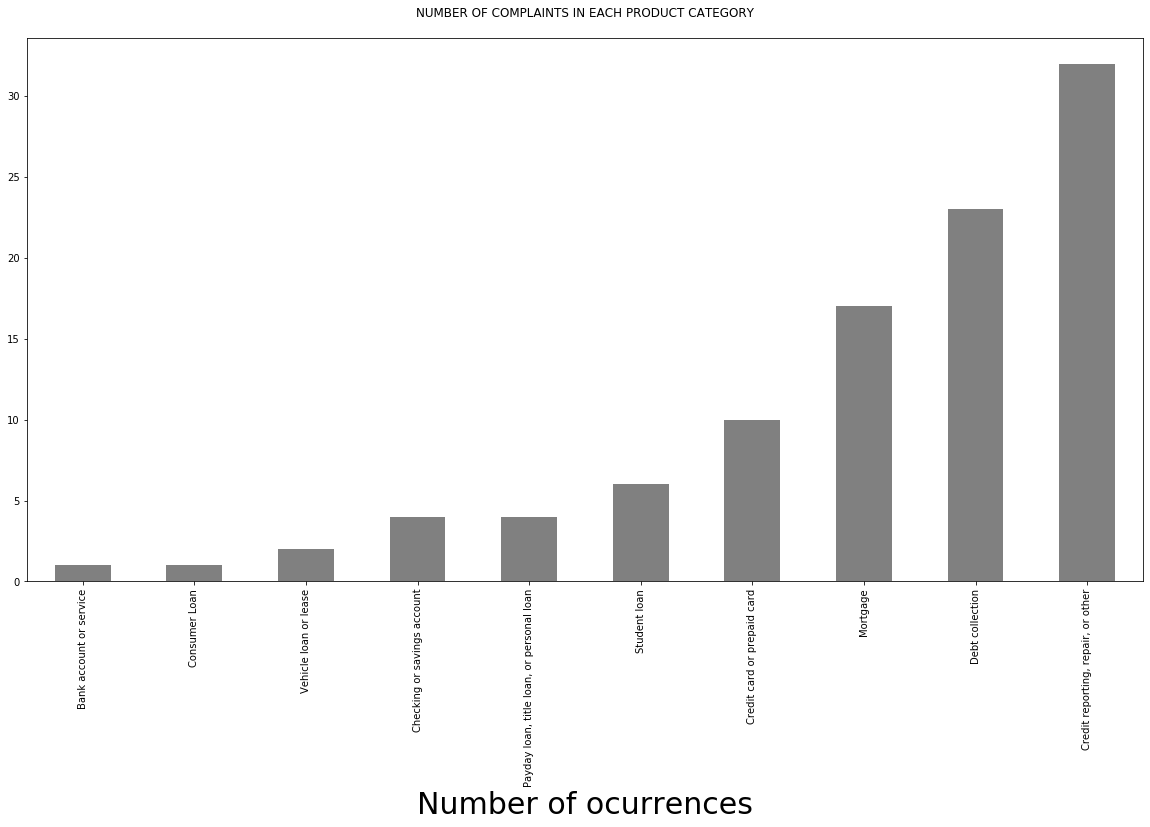

In [19]:
fig = plt.figure(figsize = (20,10))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','darkblue','darkblue','darkblue']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.bar(ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 30);

In [20]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1, 2), stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id
print('labels are : ',labels)
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

labels are :  1251848    0
1374423    1
1031901    2
1089118    3
739705     1
          ..
592456     1
512193     1
852895     3
1333518    3
497648     3
Name: category_id, Length: 100, dtype: int64
Each of the 100 complaints is represented by 320 features (TF-IDF score of unigrams and bigrams)


In [35]:
features[0,0:320]


array([0.11701506, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05042733, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14063005, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.13181021,
       0.        , 0.        , 0.        , 0.06846349, 0.        ,
       0.09191986, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.17103911, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10923786, 0.        , 0.09464298, 0.10923786, 0.07211584,
       0.        , 0.        , 0.        , 0.16868987, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07948

In [36]:
print(df2.Consumer_complaint)

1251848    I received a threat to sue me from a debt coll...
1374423    I have reported to all 3 credit reporting agen...
1031901    I moved to the USA in XX/XX/XXXX, and subseque...
1089118    I have a mortgage with Franklin American. They...
739705     This complaint is against Equifax Credit Repor...
                                 ...                        
592456     On numerous occasions Ive contacted Transunion...
512193     filed section 609 or verification was not veri...
852895     On XXXX/XXXX/16 I made the last payment on a P...
1333518    I am in the process of selling my home and pur...
497648     I bought a house in XXXX, refinanced at {$3200...
Name: Consumer_complaint, Length: 100, dtype: object


In [30]:
N = 3
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(Product))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Bank account or service:
  * Most Correlated Unigrams are: checking, bank, overdraft
  * Most Correlated Bigrams are: debit card, overdraft fees, overdraft fee

==> Checking or savings account:
  * Most Correlated Unigrams are: branch, deposit, checking
  * Most Correlated Bigrams are: debit card, savings account, checking account

==> Consumer Loan:
  * Most Correlated Unigrams are: dealership, car, vehicle
  * Most Correlated Bigrams are: lien release, hard inquire, repo vehicle

==> Credit card or prepaid card:
  * Most Correlated Unigrams are: amex, express, card
  * Most Correlated Bigrams are: annual fee, american express, credit card

==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: experian, report, equifax
  * Most Correlated Bigrams are: credit reporting, credit file, credit report

==> Debt collection:
  * Most Correlated Unigrams are: collect, collection, debt
  * Most Correlated Bigrams are: collection agency, debt collector, collect debt

==>

In [31]:
X = df2['Consumer_complaint']
y = df2['Product']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

In [33]:
len(X_test)

2500

In [34]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [47]:
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    print('model name is ',model_name)
    print('passed features are',features)
    print('passed label is',labels)
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    print('Accuracy is ',accuracies)
    for fold_idx, accuracy in enumerate(accuracies):
        print('fold_idx is ',fold_idx,'and model_name is',model_name,'and hence the accuracy is ',accuracy)
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

model name is  RandomForestClassifier
passed features are [[0.04644895 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.05606667 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
passed label is 1251848     0
1374423     1
1031901     2
1089118     3
739705      1
           ..
760952      0
887934      1
1415184     1
711097     10
1104981     1
Name: category_id, Length: 10000, dtype: int64


c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:651: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy is  [0.37288136 0.38092861 0.373      0.38426854 0.3754386 ]
fold_idx is  0 and model_name is RandomForestClassifier and hence the accuracy is  0.3728813559322034
fold_idx is  1 and model_name is RandomForestClassifier and hence the accuracy is  0.38092860708936593
fold_idx is  2 and model_name is RandomForestClassifier and hence the accuracy is  0.373
fold_idx is  3 and model_name is RandomForestClassifier and hence the accuracy is  0.3842685370741483
fold_idx is  4 and model_name is RandomForestClassifier and hence the accuracy is  0.37543859649122807
model name is  LinearSVC
passed features are [[0.04644895 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.05606667 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0. 

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:651: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy is  [0.78315055 0.77483774 0.78       0.78056112 0.78496241]
fold_idx is  0 and model_name is LinearSVC and hence the accuracy is  0.7831505483549352
fold_idx is  1 and model_name is LinearSVC and hence the accuracy is  0.7748377433849226
fold_idx is  2 and model_name is LinearSVC and hence the accuracy is  0.78
fold_idx is  3 and model_name is LinearSVC and hence the accuracy is  0.7805611222444889
fold_idx is  4 and model_name is LinearSVC and hence the accuracy is  0.7849624060150376
model name is  MultinomialNB
passed features are [[0.04644895 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.05606667 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
passed

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:651: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy is  [0.63160518 0.62656016 0.6335     0.62675351 0.64461153]
fold_idx is  0 and model_name is MultinomialNB and hence the accuracy is  0.63160518444666
fold_idx is  1 and model_name is MultinomialNB and hence the accuracy is  0.6265601597603595
fold_idx is  2 and model_name is MultinomialNB and hence the accuracy is  0.6335
fold_idx is  3 and model_name is MultinomialNB and hence the accuracy is  0.6267535070140281
fold_idx is  4 and model_name is MultinomialNB and hence the accuracy is  0.6446115288220552
model name is  LogisticRegression
passed features are [[0.04644895 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.05606667 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.   

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:651: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a so

Accuracy is  [0.7552343  0.75137294 0.749      0.75300601 0.76340852]
fold_idx is  0 and model_name is LogisticRegression and hence the accuracy is  0.755234297108674
fold_idx is  1 and model_name is LogisticRegression and hence the accuracy is  0.7513729405891163
fold_idx is  2 and model_name is LogisticRegression and hence the accuracy is  0.749
fold_idx is  3 and model_name is LogisticRegression and hence the accuracy is  0.753006012024048
fold_idx is  4 and model_name is LogisticRegression and hence the accuracy is  0.7634085213032581


In [48]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc


,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.780702,0.003842
LogisticRegression,0.754404,0.005525
MultinomialNB,0.632606,0.007361
RandomForestClassifier,0.377303,0.005080


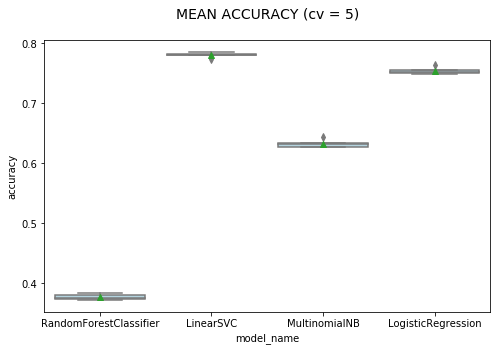

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [50]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df2.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df2['Product'].unique()))

				CLASSIFICATIION METRICS

                                                    precision    recall  f1-score   support

                                   Debt collection       0.76      0.79      0.78       530
                Credit reporting, repair, or other       0.80      0.87      0.83       870
                       Credit card or prepaid card       0.77      0.75      0.76       275
                                          Mortgage       0.83      0.93      0.88       321
                                      Student loan       0.84      0.82      0.83       123
                             Vehicle loan or lease       0.52      0.36      0.43        44
                       Checking or savings account       0.53      0.61      0.57       101
         Payday loan, title loan, or personal loan       0.65      0.24      0.35        46
                           Bank account or service       0.54      0.31      0.39        85
                                     Consumer Loan

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


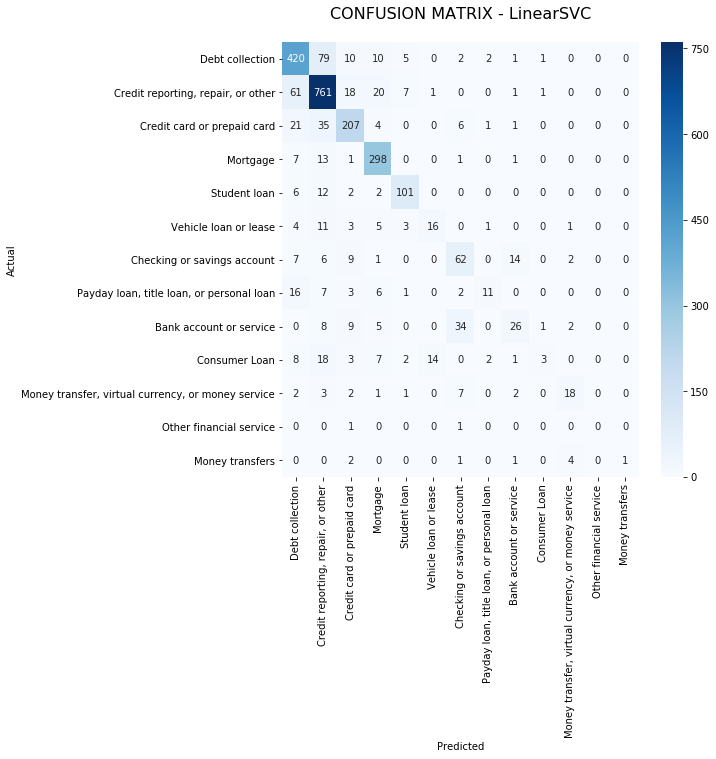

In [52]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [53]:
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 20:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], 
                                                           id_to_category[predicted], 
                                                           conf_mat[actual, predicted]))
    
            display(df2.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 
                                                                'Consumer_complaint']])
            print('')


'Credit reporting, repair, or other' predicted as 'Debt collection' : 61 examples.


,Product,Consumer_complaint
367348,"Credit reporting, repair, or other",Mohela Department of education Opened XX/XX/15...
739533,"Credit reporting, repair, or other",XXXX unauthorized use of name account unknown ...
1138363,"Credit reporting, repair, or other",I AM NOT THE ONE THAT OPENED UP ACCOUNT XXXX T...
174047,"Credit reporting, repair, or other",XXXX XXXX has a debt listed my credit reports ...
468418,"Credit reporting, repair, or other",I have disputed XXXX Collection debt {$540.00}...
722459,"Credit reporting, repair, or other",I initially called the company Collection Cons...
562025,"Credit reporting, repair, or other",I have been trying to get this resolved for so...
623649,"Credit reporting, repair, or other",XXXX is using my credit report against me for ...
1351099,"Credit reporting, repair, or other",I have had this service for more the seven yea...
22458,"Credit reporting, repair, or other","I notified the credit reporting agencies, lett..."



'Credit card or prepaid card' predicted as 'Debt collection' : 21 examples.


,Product,Consumer_complaint
1032923,Credit card or prepaid card,TD Credit/ XXXX XXXX cancelled my credit...
635944,Credit card or prepaid card,XXXX 2017 XXXX credit card reward certificate ...
783293,Credit card or prepaid card,", XXXX XXXX, Il, XXXX, entity number is XXXX, ..."
1159844,Credit card or prepaid card,"My credit card company, Fifth Third Bank, whic..."
118376,Credit card or prepaid card,I went to the doctor and I did n't have insura...
470322,Credit card or prepaid card,I have an Army/Air Force Exchange Service ( AA...
573852,Credit card or prepaid card,"XX/XX/2015, Midland Credit Management was told..."
1402733,Credit card or prepaid card,Good Evening ; I been trying to reach out to c...
682941,Credit card or prepaid card,I did have an account with XXXX XXXX Credit ca...
823872,Credit card or prepaid card,My credit report shows an account with a balan...



'Debt collection' predicted as 'Credit reporting, repair, or other' : 79 examples.


,Product,Consumer_complaint
1036446,Debt collection,To Whom It May Concern : REF : Intent to file ...
1051114,Debt collection,"Hi, I relocated to XXXX from XXXX in XXXX 2015..."
1160868,Debt collection,Your options do not include the problem in thi...
1403818,Debt collection,identity theft
1184625,Debt collection,On XX/XX/2018 I filed a written dispute ( USPS...
523114,Debt collection,XXXX {$19000.00} disputed this car loan with X...
810603,Debt collection,This is a fraudulent account and State Farm ha...
655880,Debt collection,At this time The credit clearinghouse is curre...
175641,Debt collection,"On XXXX/XXXX/XXXX, I was contacted by Cavalry ..."
1383644,Debt collection,I sent a police report to XXXX in XX/XX/2018 X...



'Credit card or prepaid card' predicted as 'Credit reporting, repair, or other' : 35 examples.


,Product,Consumer_complaint
82947,Credit card or prepaid card,I filed a dispute with XXXX XXXX XXXX XXXX. fi...
870039,Credit card or prepaid card,Ref : CFPB Case # XXXX It is requested the clo...
1284867,Credit card or prepaid card,I noticed this charge card on my credit report...
920494,Credit card or prepaid card,I paid a {$11000.00} fee and forfeited {$XXXX}...
798993,Credit card or prepaid card,My credit card account was suddenly and unexpe...
1057341,Credit card or prepaid card,walmart decreased the limit without any waring...
982174,Credit card or prepaid card,Within the past week some Wells Fargo employee...
457054,Credit card or prepaid card,USAA Financial Services reported that I was 30...
17268,Credit card or prepaid card,To Whom It May Concern : Thank you for taking ...
2802,Credit card or prepaid card,"On XX/XX/XXXX and XX/XX/XXXX, I sent Penfed Cr..."



'Credit reporting, repair, or other' predicted as 'Mortgage' : 20 examples.


,Product,Consumer_complaint
75436,"Credit reporting, repair, or other",In XXXX I filed my XXXX tax return. I had no k...
971703,"Credit reporting, repair, or other",In XXXX of 2012 my personal life took a bit of...
1253422,"Credit reporting, repair, or other",My mortgage company loan Depot is not reportin...
1129559,"Credit reporting, repair, or other",I am writing in to complain and attempt to acq...
305755,"Credit reporting, repair, or other","I filed bankruptcy on XXXX XXXX, and my mortga..."
148992,"Credit reporting, repair, or other",I have filed several complaints already regard...
43245,"Credit reporting, repair, or other",This is regarding XXXX XXXX who I have mortgag...
379182,"Credit reporting, repair, or other",I paid my mortgage and Guild Mortgage still re...
322664,"Credit reporting, repair, or other","Once again, there is activity that is INCORREC..."
249033,"Credit reporting, repair, or other","I opened a mortgage with XXXX in XXXX, the mor..."



'Bank account or service' predicted as 'Checking or savings account' : 34 examples.


,Product,Consumer_complaint
1008395,Bank account or service,"Santander Bank, without giving any reason, ask..."
389142,Bank account or service,I signed up for a Citigold checking account on...
484569,Bank account or service,On XX/XX/XXXX I deposited an out of state chec...
896674,Bank account or service,I was studying in the XXXX last year and opene...
1058036,Bank account or service,USAA denied our fraud claim where transfers of...
79526,Bank account or service,I live in XXXX. On XX/XX/2017 & XX/XX/2017 som...
195593,Bank account or service,"Good Morning, I have been a Chase authorized u..."
147639,Bank account or service,Huntington Bank 's decision to stop using depo...
497435,Bank account or service,I am the Payee Upon Death on my aunt 's accoun...
233889,Bank account or service,I have Bank of America as my bank I had deposi...


In [54]:
model.fit(features, labels)

N = 4
for Product, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("\n==> '{}':".format(Product))
    print("  * Top unigrams: %s" %(', '.join(unigrams)))
    print("  * Top bigrams: %s" %(', '.join(bigrams)))



==> 'Bank account or service':
  * Top unigrams: bank, debit, checking, promotion
  * Top bigrams: bank xxxx, business account, 00 fee, information bank

==> 'Checking or savings account':
  * Top unigrams: chase, bank, branch, withdrawals
  * Top bigrams: checking account, debit card, fraud department, savings account

==> 'Consumer Loan':
  * Top unigrams: loan, car, vehicle, dealership
  * Top bigrams: past xxxx, lien release, credit xxxx, report permission

==> 'Credit card or prepaid card':
  * Top unigrams: card, synchrony, discover, citi
  * Top bigrams: american express, balance transfer, annual fee, credit card

==> 'Credit reporting, repair, or other':
  * Top unigrams: equifax, transunion, experian, report
  * Top bigrams: xxxx xxxx, loan credit, credit agencies, trans union

==> 'Debt collection':
  * Top unigrams: debt, collection, owe, company
  * Top bigrams: debt paid, violation knowledge, xxxx said, trying collect

==> 'Money transfer, virtual currency, or money servi

In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)


NameError: name 'train_test_split' is not defined

In [ ]:
new_complaint = """I have been enrolled back at XXXX XXXX University in the XX/XX/XXXX. Recently, i have been harassed by \
Navient for the last month. I have faxed in paperwork providing them with everything they needed. And yet I am still getting \
phone calls for payments. Furthermore, Navient is now reporting to the credit bureaus that I am late. At this point, \
Navient needs to get their act together to avoid me taking further action. I have been enrolled the entire time and my \
deferment should be valid with my planned graduation date being the XX/XX/XXXX."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))


In [ ]:
df2[df2['Consumer_complaint'] == new_complaint]


In [ ]:
new_complaint_2 = """Equifax exposed my personal information without my consent, as part of their recent data breach. \
In addition, they dragged their feet in the announcement of the report, and even allowed their upper management to sell \
off stock before the announcement."""
print(model.predict(fitted_vectorizer.transform([new_complaint_2])))


In [ ]:
df2[df2['Consumer_complaint'] == new_complaint_2]
